# Objectifs du notebook

## Analyse et préparation des données clients pour la segmentation

Ce notebook traite de l'exploration et de la préparation des données clients dans le cadre d'une segmentation. L'objectif est de préparer les données et de créer des features pertinentes pour une future segmentation.

### Étapes suivies :
1. **Exploration des données** : Visualisation pour mieux comprendre la distribution des variables
2. **Nettoyage des données** : Gestion des valeurs manquantes, vérification des types de données, etc.
3. **Standardisation des données brutes** pour les préparer aux analyses futures
4. **Création de nouvelles features** : RFM score, panier moyen, etc.
5. **Standardisation des nouvelles features** créées
6. **Sauvegarde du DataFrame final** pour une utilisation ultérieure

In [1]:
# Importer les bibliothèques nécessaires pour le traitement
# des données et la visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importer StandardScaler pour la standardisation des features
from sklearn.preprocessing import StandardScaler

In [2]:
# Importer le fichier CSV contenant les données clients
df_original = pd.read_csv('extraction.csv')

# Créer une copie du DataFrame original pour le traitement
# et éviter de modifier les données brutes
df = df_original.copy()

# Afficher les premières lignes du DataFrame pour vérifier
# l'importation des données
df.head()

,customer_unique_id,recency,frequency,total_spent,avg_review_score,product_variety,payment_methods
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,5.0,1,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,4.0,1,credit_card
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22,3.0,1,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,4.0,1,credit_card
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,5.0,1,credit_card


# Exploration des données

## Répartition des clients en fonction de leur fréquence d'achat

Cette visualisation montre la répartition des clients selon le nombre de commandes qu'ils ont passées. Cela permet d'identifier la proportion de clients fidèles, ceux qui reviennent fréquemment pour effectuer plusieurs achats.

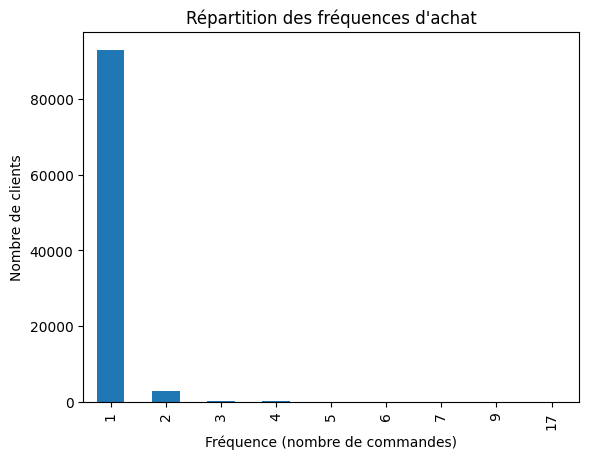

In [3]:
# Visualiser la répartition des fréquences d'achat 
# (nombre de commandes par client)
df['frequency'].value_counts().plot(kind='bar')

# Ajouter les labels et le titre pour clarifier la signification du graphique
plt.title('Répartition des fréquences d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de clients')

# Afficher le graphique
plt.show()                                    # Afficher le graphique

## Répartition des fréquences d'achat (échelle logarithmique)

Nous utilisons ici une échelle logarithmique pour visualiser la répartition des fréquences d'achat des clients. L'échelle logarithmique permet de mieux représenter la distribution des fréquences lorsque certaines valeurs (comme les clients qui commandent fréquemment) sont beaucoup moins nombreuses que d'autres.

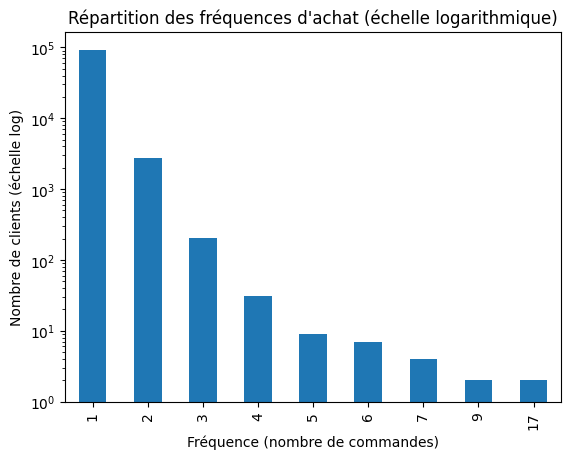

In [4]:
# Visualiser la répartition des fréquences d'achat avec
# une échelle logarithmique
df['frequency'].value_counts().plot(kind='bar', log=True)

# Ajouter un titre et des labels, en précisant l'utilisation
# de l'échelle logarithmique
plt.title('Répartition des fréquences d\'achat (échelle logarithmique)')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de clients (échelle log)')

# Afficher le graphique
plt.show()

## Dépense moyenne en fonction de la fréquence d'achat

Cette visualisation montre la relation entre la fréquence d'achat des clients et le montant moyen qu'ils dépensent. Cela nous permet d'identifier si les clients qui achètent fréquemment dépensent plus que ceux qui achètent moins souvent.

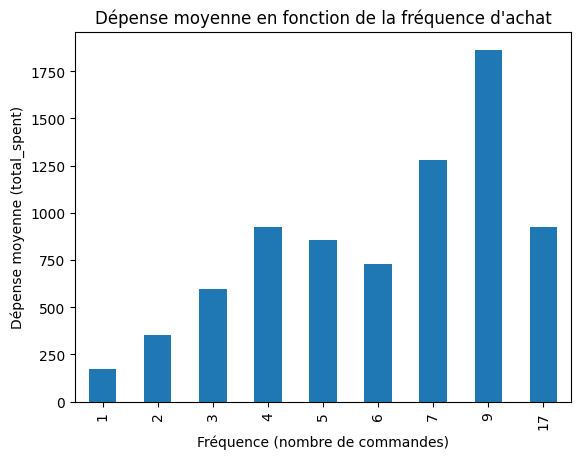

In [5]:
# Visualiser la dépense moyenne en fonction de la fréquence d'achat
df.groupby('frequency')['total_spent'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Dépense moyenne en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Dépense moyenne (total_spent)')

# Afficher le graphique
plt.show()

## Récence moyenne en fonction de la fréquence d'achat

Cette visualisation montre la relation entre la fréquence d'achat des clients et la récence moyenne (le temps écoulé depuis leur dernière commande). Cela permet de comprendre si les clients qui achètent fréquemment reviennent plus souvent ou s'il y a un délai important entre leurs achats.

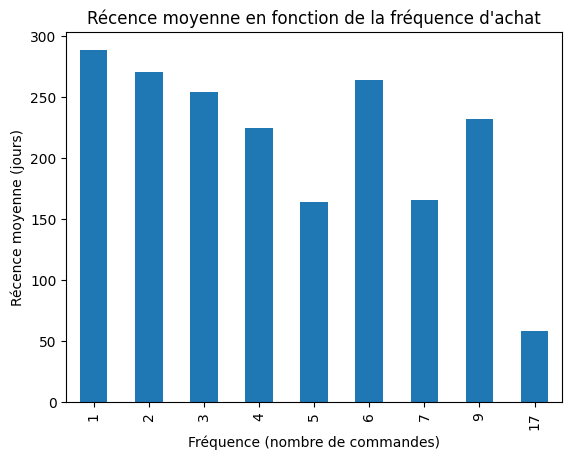

In [6]:
# Visualiser la récence moyenne en fonction de la fréquence d'achat
df.groupby('frequency')['recency'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Récence moyenne en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Récence moyenne (jours)')

# Afficher le graphique
plt.show()

## Diversité des produits en fonction de la fréquence d'achat

Cette visualisation permet d'observer la relation entre la fréquence d'achat et la diversité des produits achetés par les clients. Cela nous aide à comprendre si les clients qui commandent fréquemment ont tendance à acheter une plus grande variété de produits.

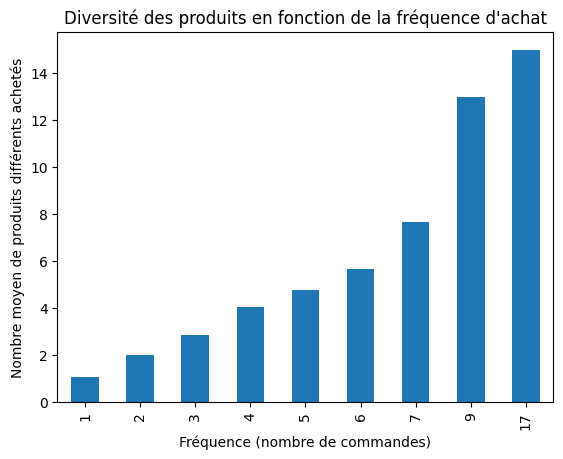

In [7]:
# Visualiser la diversité des produits en fonction de la fréquence d'achat
df.groupby('frequency')['product_variety'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Diversité des produits en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre moyen de produits différents achetés')

# Afficher le graphique
plt.show()

## Modes de paiement en fonction de la fréquence d'achat

Cette visualisation empilée montre la distribution des modes de paiement utilisés par les clients en fonction de la fréquence de leurs commandes. Cela permet de comprendre quels modes de paiement sont les plus populaires pour les clients qui achètent fréquemment ou moins fréquemment.

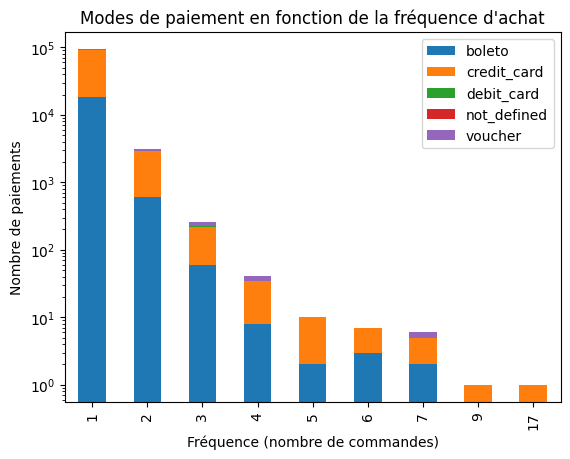

In [8]:
# Créer un graphique empilé pour visualiser les modes de paiement
# par fréquence d'achat
# Les modes de paiement sont représentés en colonnes séparées (dummies)
# avec la fonction get_dummies()
df['payment_methods'].str.get_dummies(',').groupby(
    df['frequency']).sum().plot(kind='bar', stacked=True, log=True)

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Modes de paiement en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de paiements')

# Afficher le graphique
plt.show()

## Modes de paiement en fonction de la fréquence d'achat (échelle logarithmique)

Cette visualisation montre la répartition des modes de paiement en fonction de la fréquence d'achat, mais cette fois-ci en utilisant une échelle logarithmique. Cela permet de mieux observer la distribution lorsque certaines fréquences de paiement sont beaucoup plus rares ou beaucoup plus fréquentes.

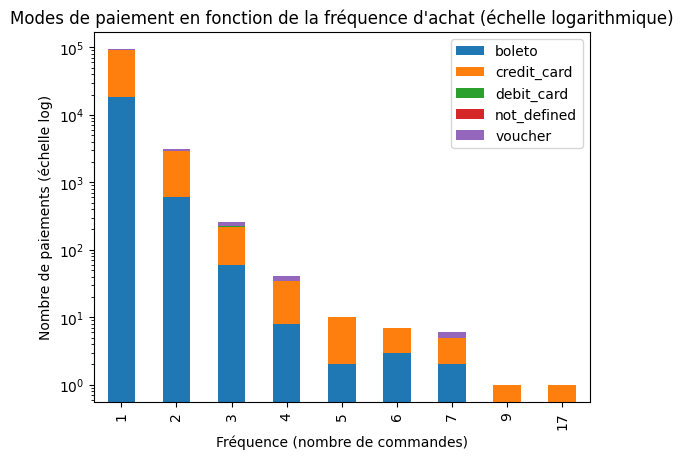

In [9]:
# Visualiser les modes de paiement par fréquence d'achat en utilisant
# une échelle logarithmique
df['payment_methods'].str.get_dummies(',').groupby(
    df['frequency']).sum().plot(kind='bar', stacked=True, log=True)

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title(
    'Modes de paiement en fonction de la fréquence d\'achat (échelle logarithmique)'
)
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de paiements (échelle log)')

# Afficher le graphique
plt.show()

## Proportion des modes de paiement en fonction de la fréquence d'achat

Cette visualisation montre la proportion des différents modes de paiement utilisés par les clients en fonction de la fréquence d'achat. Chaque barre empilée représente la proportion relative de chaque mode de paiement pour une fréquence d'achat donnée.

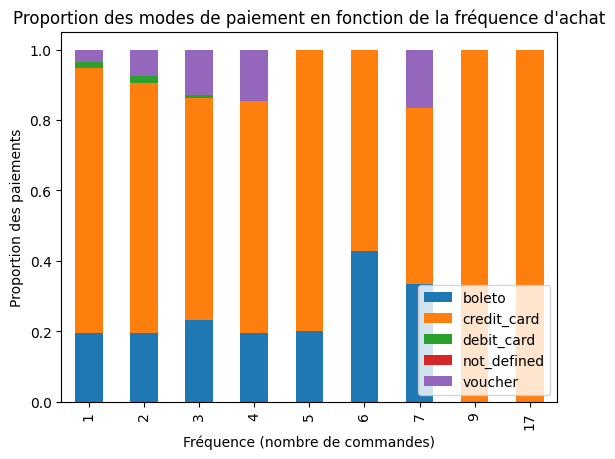

In [10]:
# Visualiser la proportion des modes de paiement par fréquence d'achat
# Chaque mode de paiement est divisé par le total pour représenter les proportions
df['payment_methods'].str.get_dummies(',').groupby(df['frequency']).sum() \
    .apply(lambda x: x / x.sum(), axis=1) \
    .plot(kind='bar', stacked=True)

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title(
    'Proportion des modes de paiement en fonction de la fréquence d\'achat'
)
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Proportion des paiements')

# Afficher le graphique
plt.show()

## Note moyenne en fonction de la fréquence d'achat

Cette visualisation montre la relation entre la fréquence d'achat et la note moyenne des reviews laissées par les clients. Cela permet d'observer si les clients qui achètent plus souvent laissent des avis plus positifs ou plus négatifs.

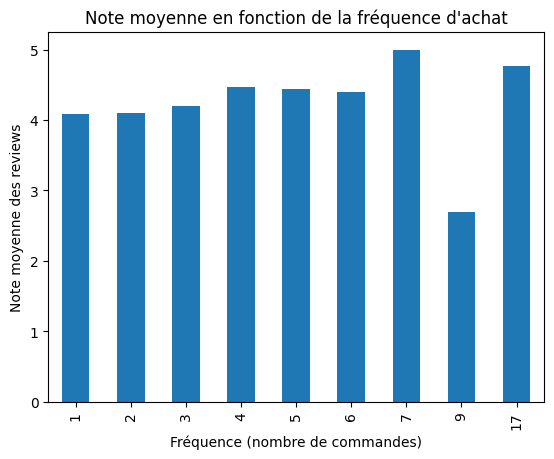

In [11]:
# Visualiser la note moyenne des reviews en fonction de la fréquence d'achat
df.groupby('frequency')['avg_review_score'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Note moyenne en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Note moyenne des reviews')

# Afficher le graphique
plt.show()

## Corrélation entre la récence et le total dépensé

Ce graphique en nuage de points permet de visualiser la corrélation entre la récence (le nombre de jours depuis la dernière commande) et le montant total dépensé par les clients. Il permet d'observer s'il y a un lien entre le temps écoulé depuis la dernière commande et les dépenses des clients.

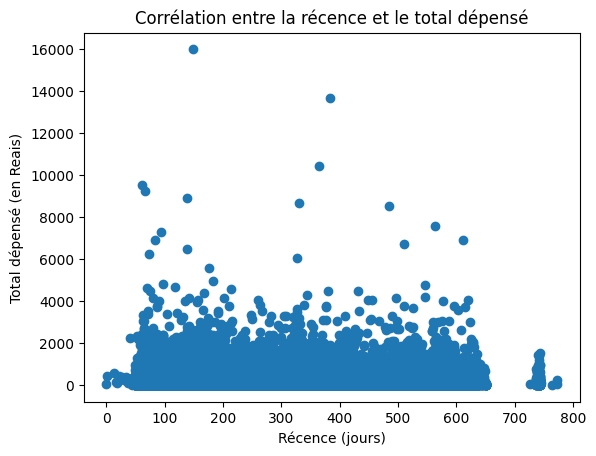

In [12]:
# Visualiser la corrélation entre la récence et le total dépensé
# Le scatter plot permet de voir s'il existe une relation
# entre ces deux variables
plt.scatter(df['recency'], df['total_spent'])

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Corrélation entre la récence et le total dépensé')
plt.xlabel('Récence (jours)')
plt.ylabel('Total dépensé (en Reais)')

# Afficher le graphique
plt.show()

# Nettoyage des données

## Vérification des valeurs manquantes

Dans cette section, nous vérifions les colonnes du DataFrame qui contiennent des valeurs manquantes. Cela nous permet de mieux comprendre quelles colonnes nécessitent une attention particulière lors du nettoyage des données.

In [13]:
# Vérifier les valeurs manquantes dans chaque colonne
# isnull().sum() permet de compter le nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Sélectionner uniquement les colonnes qui ont des valeurs manquantes
missing_columns = missing_values[missing_values > 0]

# Afficher les colonnes avec des valeurs manquantes
print(missing_columns)

total_spent           1
avg_review_score    716
payment_methods       1
dtype: int64


## Traitement des valeurs manquantes

Dans cette section, nous remplissons les valeurs manquantes dans plusieurs colonnes en fonction de la nature des données. Cela nous permet de garder un DataFrame complet sans perdre d'informations importantes.

In [14]:
# Remplir les valeurs manquantes dans les colonnes

# Remplir 'total_spent' par la moyenne des montants dépensés
df['total_spent'] = df['total_spent'].fillna(df['total_spent'].mean())

# Remplir 'avg_review_score' par la moyenne des notes des reviews
df['avg_review_score'] = df['avg_review_score'].fillna(
    df['avg_review_score'].mean()
)

# Créer une colonne binaire 'has_review' pour indiquer si un client
# a laissé une review
df['has_review'] = df['avg_review_score'].notna().astype(bool)

# Remplir 'payment_methods' par 'not_defined' pour les valeurs manquantes
df['payment_methods'] = df['payment_methods'].fillna('not_defined')

## Vérification des types de données

Nous vérifions ici les types de données dans le DataFrame pour nous assurer que chaque colonne est bien typée et prête pour la suite du traitement. Cela nous permet de voir si certaines colonnes nécessitent une conversion ou un traitement supplémentaire.

In [15]:
# Vérifier les types de données dans le DataFrame
print(df.dtypes)

customer_unique_id     object
recency               float64
frequency               int64
total_spent           float64
avg_review_score      float64
product_variety         int64
payment_methods        object
has_review               bool
dtype: object


## Encodage des colonnes catégorielles

Nous encodons la colonne `payment_methods` avec des variables binaires (one-hot encoding) pour rendre les données catégorielles compatibles avec les modèles d'analyse.

In [16]:
# Encodage de la colonne 'payment_methods' en variables binaires
df = pd.get_dummies(df, columns=['payment_methods'])

## Visualisation des outliers pour total_spent

Cette visualisation à l'aide d'un boxplot permet de repérer les éventuels outliers dans la colonne `total_spent`. Cela nous aide à comprendre si certains clients ont dépensé des montants extrêmement élevés par rapport à la majorité des autres clients.

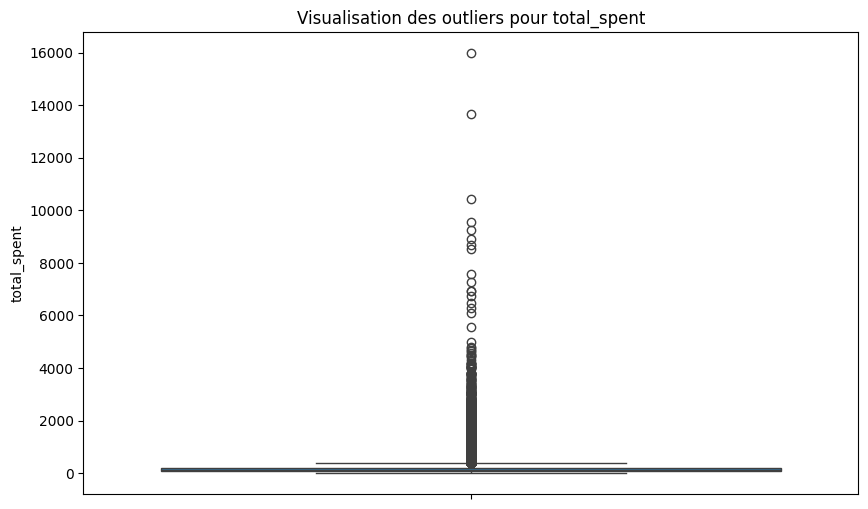

In [17]:
# Visualiser les outliers pour la variable 'total_spent' à l'aide d'un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['total_spent'])

# Ajouter un titre pour clarifier la signification du graphique
plt.title('Visualisation des outliers pour total_spent')

# Afficher le graphique
plt.show()

Nous avons visualisé les outliers dans la colonnes total_spent, à l'aide d'un boxplot. Cela nous a permis de mieux comprendre la distribution des données, et nous avons décidé de conserver les outliers. Ces valeurs extrêmes représentent potentiellement des clients ayant des comportements spécifiques, comme de gros dépensiers ou des clients VIP, ce qui peut être précieux pour la segmentation et l'analyse future.

# Standardisation des données brutes

Dans cette étape, nous standardisons les colonnes numériques du DataFrame. Cela permet de rendre les variables comparables entre elles en les ramenant à une même échelle (moyenne 0, écart-type 1). Cette transformation est importante avant d'appliquer certains algorithmes de machine learning, comme le clustering, qui sont sensibles à la variance des données.

In [18]:
# Sélectionner les colonnes numériques à standardiser, excluant
# les colonnes booléennes
# La standardisation ne s'applique qu'aux colonnes numériques
cols_to_standardize = df.select_dtypes(include=['float64', 'int64']).columns \
    .difference(df.select_dtypes('bool').columns)

# Appliquer la standardisation (moyenne 0, écart-type 1)
# aux colonnes sélectionnées
scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

# Création de nouvelles features

Dans cette section, nous créons de nouvelles features basées sur les variables existantes pour enrichir notre analyse. Cela inclut le calcul des scores RFM (Récence, Fréquence, Montant), le panier moyen, et un score pondéré des reviews. Ces nouvelles features permettront de mieux comprendre les comportements des clients et d'améliorer la segmentation.

## Création des rangs pour Récence, Fréquence et Montant (RFM)

Nous utilisons la méthode `qcut` pour diviser les colonnes `recency`, `frequency`, et `total_spent` en 5 groupes égaux. Cela permet de classer les clients en fonction de ces trois dimensions, ce qui est la base du calcul du score RFM.

In [19]:
# Créer des rangs pour la Récence, la Fréquence et le Montant en utilisant qcut
# qcut divise chaque colonne en 5 groupes égaux
df['recency_rank'] = pd.qcut(
    df_original['recency'], 5, labels=False, duplicates='drop'
)
df['frequency_rank'] = pd.qcut(
    df_original['frequency'], 5, labels=False, duplicates='drop'
)
df['monetary_rank'] = pd.qcut(
    df_original['total_spent'], 5, labels=False, duplicates='drop'
)

## Calcul du score RFM

Le score RFM est la somme des rangs de la Récence, de la Fréquence et du Montant. Un score RFM élevé indique un client fidèle qui a commandé récemment, fréquemment, et qui dépense beaucoup.

In [20]:
# Calculer le score RFM en additionnant les rangs de la récence,
# de la fréquence et du montant
df['RFM_score'] = (
    df['recency_rank'] + df['frequency_rank'] + df['monetary_rank']
)

## Calcul du panier moyen

Le panier moyen est calculé en divisant le montant total dépensé par le nombre de commandes. Cela permet de mesurer combien un client dépense en moyenne à chaque commande.

In [21]:
# Remplacer les fréquences nulles par 1 pour éviter la division par zéro
df['frequency'] = df_original['frequency'].replace(0, 1)

# Calculer le panier moyen en divisant le total dépensé par la fréquence
df['average_order_value'] = (
    df_original['total_spent'] / df_original['frequency']
)

## Calcul du score pondéré des reviews

Le score pondéré des reviews est obtenu en multipliant la note moyenne des reviews par la fréquence d'achat. Cela permet de donner plus de poids aux clients qui achètent fréquemment.

In [22]:
# Calculer le score pondéré des reviews en multipliant la note moyenne
# par la fréquence d'achat
df['weighted_review_score'] = (
    df_original['avg_review_score'] * df_original['frequency']
)

## Calcul du score final

Le score final est la somme du score RFM, de la diversité des produits et du score pondéré des reviews. Ce score est un indicateur global de la valeur et de l'engagement du client.

In [23]:
# Calculer le score final en additionnant le score RFM,
# la diversité des produits, et le score pondéré des reviews
df['final_score'] = (
    df['RFM_score'] + df['product_variety'] + df['weighted_review_score']
)

# Standardisation des nouvelles features

Après avoir créé les nouvelles features, nous appliquons une standardisation pour les ramener à une échelle comparable. Cela garantit que chaque feature a une moyenne de 0 et un écart-type de 1, ce qui est crucial pour certains algorithmes de machine learning comme le clustering, où les différences d'échelle peuvent fausser les résultats.

In [24]:
# Sélectionner les nouvelles features à standardiser
cols_to_standardize = [
    'RFM_score', 
    'average_order_value', 
    'weighted_review_score', 
    'final_score'
]

# Appliquer la standardisation (moyenne 0, écart-type 1)
# aux nouvelles features
df[cols_to_standardize] = StandardScaler().fit_transform(
    df[cols_to_standardize]
)

# Sauvegarde du DataFrame final

Nous sauvegardons le DataFrame final avec toutes les transformations et les nouvelles features créées. Ce fichier CSV pourra être utilisé pour la prochaine étape de l'analyse ou du modèle de segmentation.

In [25]:
# Sauvegarder le DataFrame final avec toutes les transformations
# et nouvelles features dans un fichier CSV
df.to_csv('prepared_customer_data.csv', index=False)